# FACS analysis: transiently transfected LV protein synthesis rate reporter #
* transiently transfect plasmid into 6 well plate, passage into 6 well plate after 24 hours and begin starvation after 30 hours, starve for 40 hours (70h post transfection).
* plasmid reporters 1) YFP-WT: Flag-YFPwt-DHFRwt or 2) YFP-CGG: Flag-YFPcgg-DHFRcgg

In [1]:
%matplotlib inline
from FlowCytometryTools import FCMeasurement
import matplotlib.pyplot as plt
import pandas
import numpy
from IPython.core.display import HTML
from matplotlib.ticker import MaxNLocator, LogLocator, AutoMinorLocator # custom tick locators for plots

/usr/local/lib/python2.7/dist-packages/pandas/computation/expressions.py:21: UserWarning: The installed version of numexpr 2.0.1 is not supported in pandas and will be not be used
The minimum supported version is 2.1

  "version is 2.1\n".format(ver=ver), UserWarning)


In [32]:
sampleids = {1: 'wt_rich_tmp_1',
 2: 'wt_leu_tmp_1',
 3: 'wt_arg_tmp_1',
 4: 'wt_rich_notmp_1',
 5: 'wt_leu_notmp_1',
 6: 'wt_arg_notmp_1',
 7: 'cgg_rich_tmp_1',
 8: 'cgg_leu_tmp_1',
 9: 'cgg_arg_tmp_1',
 10: 'cgg_rich_notmp_1',
 11: 'cgg_leu_notmp_1',
 12: 'cgg_arg_notmp_1',
 13: 'hek293t_1'}

#make sure this is right!

In [4]:
fcsFiles = !ls ../fcs_files/20160412/*.fcs

processeddata = dict()
for File in fcsFiles:
    print File
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    fcsdata = FCMeasurement(ID= sampleid, datafile=File)
    fsc_threshold = 5000
    ssc_threshold = 5000
    processeddata[ sampleid ] = dict()
    subset = numpy.logical_and( fcsdata.data['FSC-A'] > fsc_threshold, fcsdata.data['SSC-A'] > ssc_threshold )
    processeddata[ sampleid ]['fsc_median'] = fcsdata.data['FSC-A'][subset].median()
    processeddata[ sampleid ]['fitc_mean'] = fcsdata.data['FITC-A'][subset].mean()
    processeddata[ sampleid ]['fitc_median'] = fcsdata.data['FITC-A'][subset].median()
    processeddata[ sampleid ]['fitc_q25'] = fcsdata.data['FITC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fitc_q75'] = fcsdata.data['FITC-A'][subset].quantile(q=0.75)
    processeddata[ sampleid ]['fsc_q25'] = fcsdata.data['FSC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fsc_q75'] = fcsdata.data['FSC-A'][subset].quantile(q=0.75)        

../fcs_files/20160412/Specimen_001_Tube_001.fcs
../fcs_files/20160412/Specimen_001_Tube_002.fcs
../fcs_files/20160412/Specimen_001_Tube_003.fcs
../fcs_files/20160412/Specimen_001_Tube_004.fcs
../fcs_files/20160412/Specimen_001_Tube_005.fcs
../fcs_files/20160412/Specimen_001_Tube_006.fcs
../fcs_files/20160412/Specimen_001_Tube_007.fcs
../fcs_files/20160412/Specimen_001_Tube_008.fcs
../fcs_files/20160412/Specimen_001_Tube_009.fcs
../fcs_files/20160412/Specimen_001_Tube_010.fcs
../fcs_files/20160412/Specimen_001_Tube_011.fcs
../fcs_files/20160412/Specimen_001_Tube_012.fcs
../fcs_files/20160412/Specimen_001_Tube_013.fcs


KeyError: 13

In [5]:
data = pandas.DataFrame.from_dict( processeddata, orient='index' )

In [6]:
data['samplelabel'] = data.index
#data['samplelabel'] = map( lambda x: '_'.join(x.split('_')[:-1]), data['samplelabel'])
#groupeddata = data.groupby( ['samplelabel'] )

In [7]:
HTML(data.to_html())

In [8]:
tmpsamples = map( lambda x: x.find('notmp') == -1, data.index)
dataTmp = data[tmpsamples]
dataNoTmp = data[numpy.logical_not(tmpsamples)]
dataNoTmp.index = map( lambda x: x.replace('_notmp',''), dataNoTmp.index)
dataTmp.index = map( lambda x: x.replace('_tmp',''), dataTmp.index)

In [9]:
dataTmp

fsc_q75  fitc_median  fitc_q25       fsc_q25    fitc_mean  \
cgg_arg_1   75836.054688        24.90      4.15  54763.140625  1417.828106   
cgg_leu_1   62823.437500        20.75      1.66  45147.216797   996.415161   
cgg_rich_1  73205.132812        14.94     -0.83  54222.210938   409.202758   
wt_arg_1    90588.625000        17.43     -2.49  49701.320312  1248.529699   
wt_leu_1    59594.829102        19.92      1.66  41369.465820  1555.886177   
wt_rich_1   79179.818359        13.28     -1.66  55666.882812   482.180781   

              fitc_q75    fsc_median     samplelabel  
cgg_arg_1   219.949997  64702.089844   cgg_arg_tmp_1  
cgg_leu_1   111.220001  53275.402344   cgg_leu_tmp_1  
cgg_rich_1   43.989998  63210.703125  cgg_rich_tmp_1  
wt_arg_1     86.320000  65297.042969    wt_arg_tmp_1  
wt_leu_1    148.569992  50276.195312    wt_leu_tmp_1  
wt_rich_1    38.180000  67434.484375   wt_rich_tmp_1

In [10]:
dataNoTmp

fsc_q75  fitc_median  fitc_q25       fsc_q25   fitc_mean  \
cgg_arg_1   72820.056641        10.79     -2.49  51631.076172  258.556793   
cgg_leu_1   63559.458008         7.47     -4.98  45717.345703  225.490620   
cgg_rich_1  78235.380859         5.81     -6.64  59459.413086   58.507605   
wt_arg_1    68121.958984         9.96     -3.32  45793.083984  209.883052   
wt_leu_1    62031.751953         8.30     -4.15  42998.826172  220.194020   
wt_rich_1   81821.869141         5.81     -6.64  60164.227539   55.220232   

             fitc_q75    fsc_median       samplelabel  
cgg_arg_1   26.559999  62016.787109   cgg_arg_notmp_1  
cgg_leu_1   21.580000  53952.841797   cgg_leu_notmp_1  
cgg_rich_1  18.260000  68296.976562  cgg_rich_notmp_1  
wt_arg_1    26.559999  57506.480469    wt_arg_notmp_1  
wt_leu_1    23.240000  51935.121094    wt_leu_notmp_1  
wt_rich_1   17.430000  70258.488281   wt_rich_notmp_1

In [11]:
subtractedMedianData = pandas.DataFrame()
subtractedMedianData['fitc_median'] = dataTmp['fitc_median'] - dataNoTmp['fitc_median']

subtractedMeanData = pandas.DataFrame()
subtractedMeanData['fitc_mean'] = dataTmp['fitc_mean'] - dataNoTmp['fitc_mean']


In [12]:
subtractedMedianData
#yfp median tmp - yfp median no tmp

fitc_median
cgg_arg_1         14.11
cgg_leu_1         13.28
cgg_rich_1         9.13
wt_arg_1           7.47
wt_leu_1          11.62
wt_rich_1          7.47

In [13]:
subtractedMeanData
#yfp mean tmp - yfp mean no tmp

fitc_mean
cgg_arg_1   1159.271314
cgg_leu_1    770.924541
cgg_rich_1   350.695153
wt_arg_1    1038.646647
wt_leu_1    1335.692157
wt_rich_1    426.960549

In [15]:
subtractedMeanData['normalizedMean'] = map(lambda row: 
                                           row[1]['fitc_mean']/subtractedMeanData.ix['cgg_rich_1']['fitc_mean'] 
                                           if row[0].find('cgg') != -1
                                           else row[1]['fitc_mean']/subtractedMeanData.ix['wt_rich_1']['fitc_mean']
                                           , subtractedMeanData.iterrows())
subtractedMedianData['normalizedMedian'] = map(lambda row: 
                                           row[1]['fitc_median']/subtractedMedianData.ix['cgg_rich_1']['fitc_median'] 
                                           if row[0].find('cgg') != -1
                                           else row[1]['fitc_median']/subtractedMedianData.ix['wt_rich_1']['fitc_median']
                                           , subtractedMedianData.iterrows())

####  YFP mean expression, -tmp mean subtracted, NOT normalized to rich ####

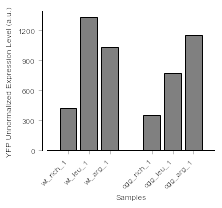

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = numpy.array([5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, subtractedMeanData['fitc_mean'][sampleOrder], align='center' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(subtractedMeanData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Unnormalized Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
fig.savefig('../plots/20160412_yfpmean_minustmpsubtracted_notnormalizedtorich.svg')
fig.savefig('../plots/20160412_yfpmean_minustmpsubtracted_notnormalizedtorich.png')

####  YFP median expression, -tmp median subtracted, not normalized to rich ####

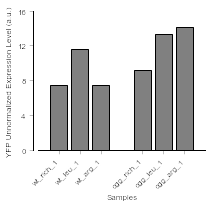

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = numpy.array([5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, subtractedMedianData['fitc_median'][sampleOrder], align='center' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(subtractedMedianData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Unnormalized Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
fig.savefig('../plots/20160412_yfpmedian_minustmpsubtracted_notnormalizedtorich.svg')
fig.savefig('../plots/20160412_yfpmedian_minustmpsubtracted_notnormalizedtorich.png')

####  YFP mean expression, -tmp mean subtracted, normalized to rich ####

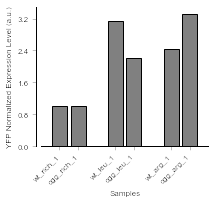

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = numpy.array([5,2,4,1,3,0])

xlocations = numpy.array([0,1,3,4,6,7])

ax.bar(xlocations, subtractedMeanData['normalizedMean'][sampleOrder], align='center' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(subtractedMeanData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Normalized Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
fig.savefig('../plots/20160412_yfpmean_minustmpsubtracted_normalizedtorich.svg')
fig.savefig('../plots/20160412_yfpmean_minustmpsubtracted_normalizedtorich.png')

####  YFP median expression, -tmp median subtracted, normalized to mCherry median ####

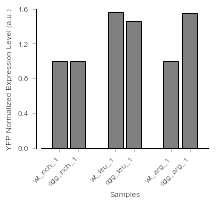

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = numpy.array([5,2,4,1,3,0])

xlocations = numpy.array([0,1,3,4,6,7])

ax.bar(xlocations, subtractedMedianData['normalizedMedian'][sampleOrder], align='center' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(subtractedMedianData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Normalized Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
fig.savefig('../plots/20160412_yfpmedian_minustmpsubtracted_normalizedtorich.svg')
fig.savefig('../plots/20160412_yfpmedian_minustmpsubtracted_normalizedtorich.png')

## Analysis v2 : Repeat analysis above with gating for YFP/mCherry positive cells after examining histograms & scatterplots of log-transformed data with FLowCytometryTools  ##

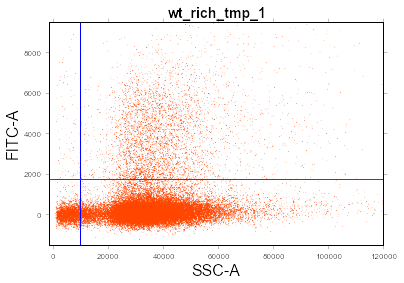

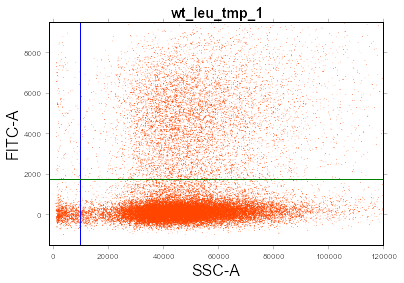

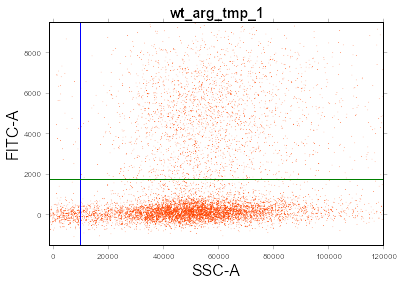

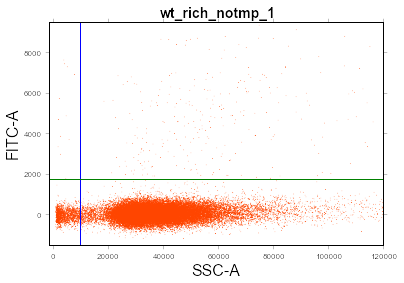

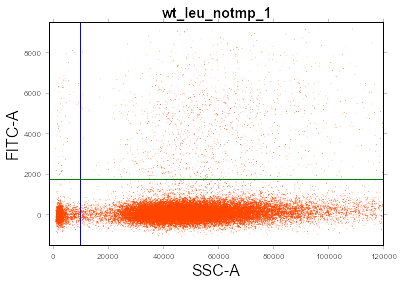

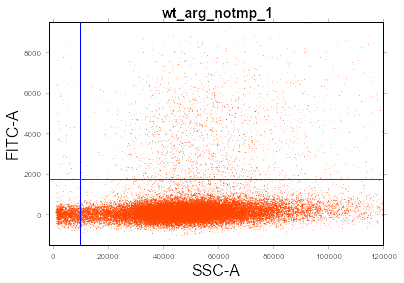

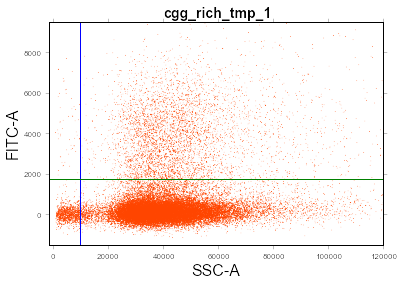

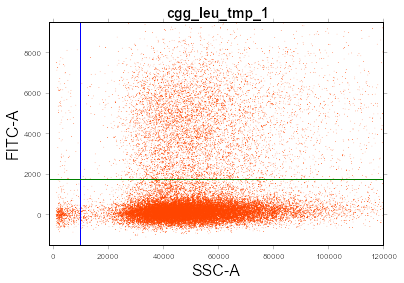

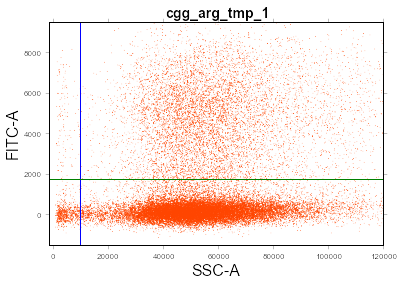

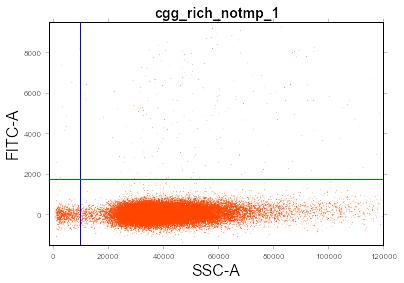

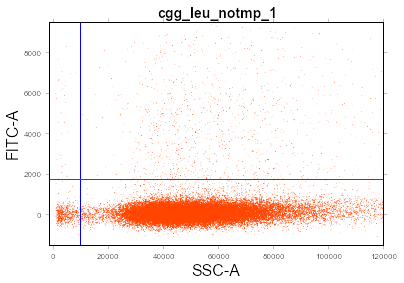

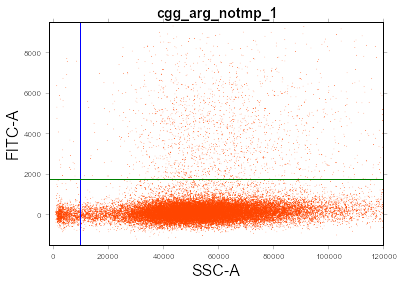

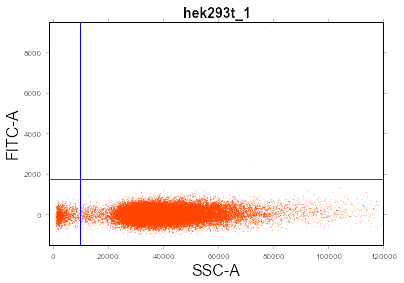

In [ ]:
import os, FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate
from pylab import *

fcsFiles = !ls ../fcs_files/20160412/*.fcs

for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    #print plotsample.ID
    #print plotsample.channel_names  #names of lasers
    #print plotsample.channels  #useful: gives voltage values for all channels so I can keep this consisent - I changed gain of FITC to 440 in this exp.
    #print type(plotsample.data) #this is a pandas data frame with entries for fsc,ssc, and each laser, and time. 
    #print plotsample.data[['FITC-A', 'PE-A']][:10]  #this prints the 1st 10 entries in each column for FITC/mCherry values
    plotdata = plotsample.data
    #print plotdata['FITC-A'].describe()   #this prints overall statistics about the data for this sample.
    #print plotdata['FITC-A'].median()
    #print plotdata['PE-A'].median()
    #print plotdata.shape[0] #how many events are in the data"tube"
    
    #define gates based on visual analysis of scatter plot
    ssc_gate = ThresholdGate(10000.0, 'SSC-A', region='above')
    fsc_gate = ThresholdGate(5000.0, 'FSC-A', region='above')
    fitc_gate = ThresholdGate(1750.0,'FITC-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A'], b=100)   # b controls the location where the transformation shifts from linear to log. The optimal value for this parameter depends on the range of your data. For smaller ranges, try smaller values of b. So if your population doesn’t show up well, just adjust b.
    axTitle = plotsample.ID
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(-1500,9500)
    ax.set_xlim(-1500,120000)
    ax.set_title( axTitle, fontsize=14, fontweight='bold')
    #tsample.plot('FITC-A', color='green', bins=100) #plots a 1D histrogram
    tsample.plot(['SSC-A', 'FITC-A'], kind='scatter', gates=[ssc_gate, fitc_gate], color='orangered', s=1, alpha=1) #plots a 2d scatter plot. s value adjusts the weight of each point. alpha adjusts the transparency of each point between 1 and 0
    #gatedsample = tsample.gate(fitc_gate, mcherry_gate)
    
    
    

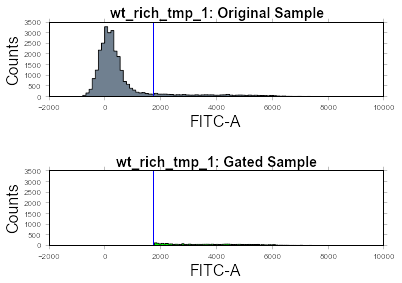

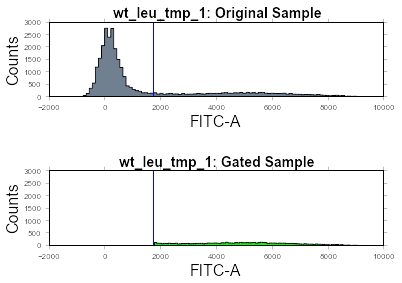

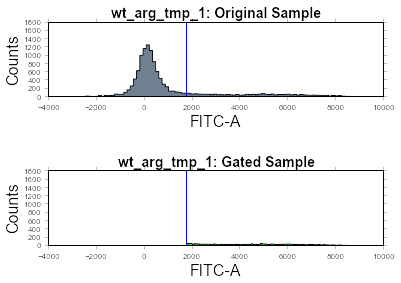

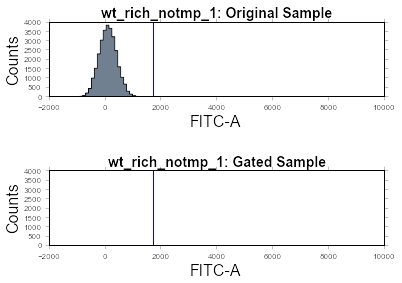

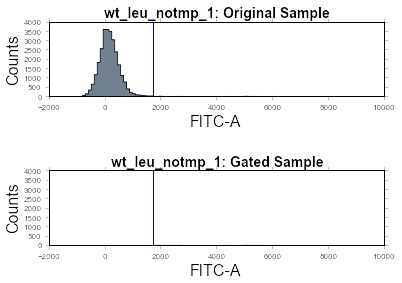

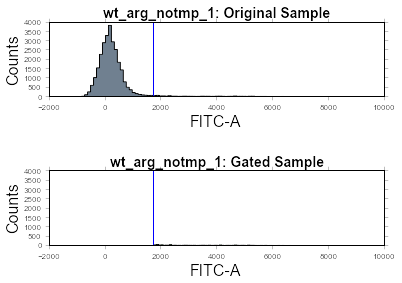

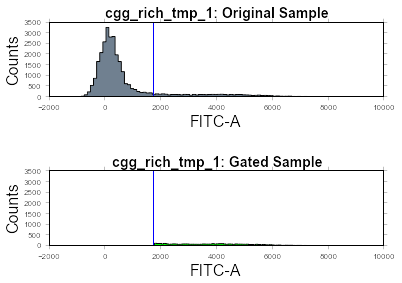

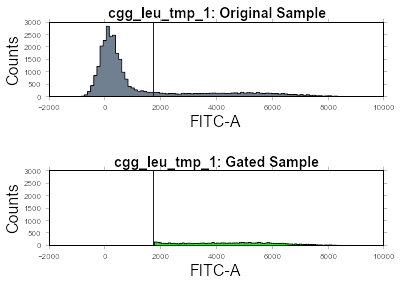

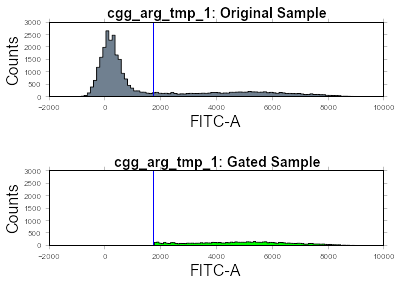

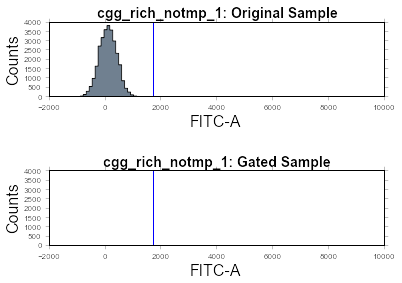

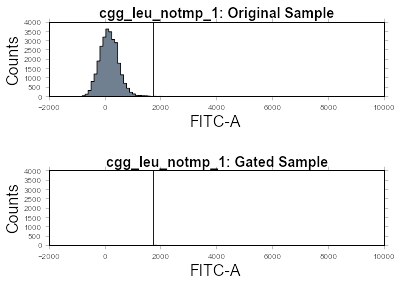

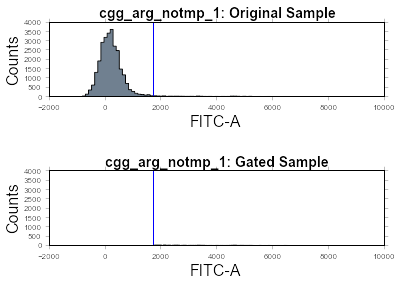

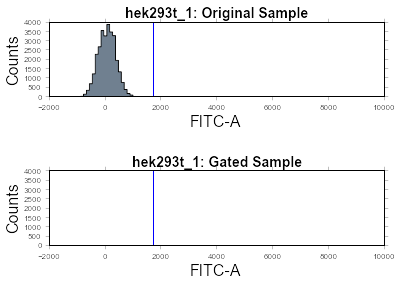

In [ ]:
import os, FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate
from pylab import *

for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    plotdata = plotsample.data
    
    fitc_gate = ThresholdGate(1750.0, 'FITC-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A'], b=100)
    gatedsample = tsample.gate(fitc_gate)
                                   
    axTitle = plotsample.ID
    
    figure()
    subplots_adjust(hspace=1)
    ax1 = subplot(211)
    tsample.plot('FITC-A', color='slategray', bins=100, gates=[fitc_gate])
    title(axTitle + ': Original Sample', fontsize=14, fontweight='bold')
    ax2 = subplot(212, sharey=ax1, sharex=ax1)
    gatedsample.plot('FITC-A', color='lime', bins=100, gates=[fitc_gate])
    title(axTitle + ': Gated Sample', fontsize=14, fontweight='bold')
        
    
    
    
    